# 데이터 구축(시현님)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pandas, matplotlib, seaborn csv 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings(action='ignore')

#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

file_path = "/content/drive/MyDrive/Salary.csv"

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 불러오기
data = pd.read_csv(file_path)

# 'Front End Developer'를 'Front end Developer'로 변경
data['Job Title'] = data['Job Title'].replace('Front End Developer', 'Front end Developer')

# 제외할 직종 목록
exclude_titles = ['Copywriter', 'Data Entry Clerk', 'Director of Human Capital',
                  'Support Specialist', 'Technical Recruiter', 'Recruiter']

# 제외할 직종 제거
data = data[~data['Job Title'].isin(exclude_titles)]

# IT 및 소프트웨어 관련 직종 필터링
it_sw_keywords = ['Software', 'Developer', 'Engineer', 'Data', 'System', 'IT', 'Tech', 'Programmer', 'Web', 'Network']
it_sw_related_jobs = data[data['Job Title'].str.contains('|'.join(it_sw_keywords), case=False)]

# 원-핫 인코딩 적용
categorical_columns = ['Job Title', 'Gender', 'Education Level', 'Country', 'Race', 'Senior']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(it_sw_related_jobs[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
combined_data = pd.concat([it_sw_related_jobs.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_df], axis=1)

# 선형 회귀 모델 구축 및 평가
X = combined_data.drop('Salary', axis=1)
y = combined_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² score: {r2}")


RMSE: 26076.807560053814
R² score: 0.7306327855414678


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 불러오기
data = pd.read_csv(file_path)

# 'Front End Developer'를 'Front end Developer'로 변경
data['Job Title'] = data['Job Title'].replace('Front End Developer', 'Front end Developer')

# 제외할 직종 목록
exclude_titles = ['Copywriter', 'Data Entry Clerk', 'Director of Human Capital',
                  'Support Specialist', 'Technical Recruiter', 'Recruiter']

# 제외할 직종 제거
data = data[~data['Job Title'].isin(exclude_titles)]

# IT 및 소프트웨어 관련 직종 필터링
it_sw_keywords = ['Software', 'Developer', 'Engineer', 'Data', 'System', 'IT', 'Tech', 'Programmer', 'Web', 'Network']
it_sw_related_jobs = data[data['Job Title'].str.contains('|'.join(it_sw_keywords), case=False)]

# 원-핫 인코딩 적용
categorical_columns = ['Job Title', 'Gender', 'Education Level', 'Country', 'Race', 'Senior']
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(it_sw_related_jobs[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
combined_data = pd.concat([it_sw_related_jobs.drop(categorical_columns, axis=1).reset_index(drop=True), encoded_df], axis=1)

# 랜덤 포레스트 모델 구축 및 평가
X = combined_data.drop('Salary', axis=1)
y = combined_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

RMSE: 11863.848641041293
R² score: 0.9442445807486252


In [ ]:
combined_data

Age  Years of Experience    Salary  Job Title_Back end Developer  \
0     32.0                  5.0   90000.0                           0.0   
1     28.0                  3.0   65000.0                           0.0   
2     29.0                  3.0   75000.0                           0.0   
3     39.0                 12.0  115000.0                           0.0   
4     30.0                  2.0   50000.0                           0.0   
...    ...                  ...       ...                           ...   
3686  27.0                  2.0   40000.0                           0.0   
3687  43.0                 15.0  150000.0                           0.0   
3688  27.0                  2.0   40000.0                           0.0   
3689  43.0                 15.0  150000.0                           0.0   
3690  27.0                  2.0   40000.0                           0.0   

      Job Title_Chief Data Officer  Job Title_Chief Technology Officer  \
0                              0.0                                 0.0   
1                              0.0                                 0.0   
2                              0.0                                 0.0   
3                              0.0                                 0.0   
4                              0.0                                 0.0   
...                            ...                                 ...   
3686                           0.0                                 0.0   
3687                           0.0                                 0.0   
3688                           0.0                                 0.0   
3689                           0.0                                 0.0   
3690                           0.0                                 0.0   

      Job Title_Data Analyst  Job Title_Data Engineer  \
0                        0.0                      0.0   
1                        1.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   
...                      ...                      ...   
3686                     0.0                      0.0   
3687                     0.0                      0.0   
3688                     0.0                      0.0   
3689                     0.0                      0.0   
3690                     0.0                      0.0   

      Job Title_Data Scientist  Job Title_Developer  ...  Race_Australian  \
0                          0.0                  0.0  ...              0.0   
1                          0.0                  0.0  ...              0.0   
2                          0.0                  0.0  ...              0.0   
3                          0.0                  0.0  ...              0.0   
4                          0.0                  0.0  ...              0.0   
...                        ...                  ...  ...              ...   
3686                       0.0                  0.0  ...              0.0   
3687                       0.0                  0.0  ...              0.0   
3688                       0.0                  0.0  ...              0.0   
3689                       0.0                  0.0  ...              1.0   
3690                       0.0                  0.0  ...              0.0   

      Race_Black  Race_Chinese  Race_Hispanic  Race_Korean  Race_Mixed  \
0            0.0           0.0            0.0          0.0         0.0   
1            0.0           0.0            1.0          0.0         0.0   
2            0.0           0.0            0.0          0.0         0.0   
3            0.0           0.0            0.0          0.0         1.0   
4            0.0           0.0            0.0          0.0         0.0   
...          ...           ...            ...          ...         ...   
3686         0.0           0.0            0.0          0.0         0.0   
3687         0.

In [ ]:
# 'combined_data' 데이터프레임의 모든 열 확인
print(combined_data.columns)

Index(['Age', 'Years of Experience', 'Salary', 'Job Title_Back end Developer',
       'Job Title_Chief Data Officer', 'Job Title_Chief Technology Officer',
       'Job Title_Data Analyst', 'Job Title_Data Engineer',
       'Job Title_Data Scientist', 'Job Title_Developer',
       'Job Title_Digital Content Producer',
       'Job Title_Digital Marketing Manager',
       'Job Title_Digital Marketing Specialist',
       'Job Title_Director of Data Science',
       'Job Title_Director of Engineering', 'Job Title_Engineer',
       'Job Title_Front end Developer', 'Job Title_Full Stack Engineer',
       'Job Title_IT Consultant', 'Job Title_IT Manager',
       'Job Title_IT Project Manager', 'Job Title_IT Support',
       'Job Title_IT Support Specialist', 'Job Title_Network Engineer',
       'Job Title_Principal Engineer', 'Job Title_Project Engineer',
       'Job Title_Quality Assurance Analyst', 'Job Title_Software Architect',
       'Job Title_Software Developer', 'Job Title_Software Eng

In [ ]:
# 'Country' 관련 원-핫 인코딩된 열들 찾기
country_columns = [col for col in combined_data.columns if col.startswith('Country_')]

# 'Job Title' 관련 원-핫 인코딩된 열들 찾기
job_title_columns = [col for col in combined_data.columns if col.startswith('Job Title_')]

# 각 국적별 직종별 종사자 수 계산
country_job_title_counts = {}
for country_col in country_columns:
    country_data = combined_data[combined_data[country_col] == 1]
    job_counts = country_data[job_title_columns].sum()
    country_job_title_counts[country_col] = job_counts

# 결과 출력
for country, counts in country_job_title_counts.items():
    print(f"{country}:\n{counts.sort_values(ascending=False)}\n")

Country_Australia:
Job Title_Software Engineer               160.0
Job Title_Data Scientist                  106.0
Job Title_Data Analyst                     83.0
Job Title_Software Engineer Manager        74.0
Job Title_Project Engineer                 72.0
Job Title_Front end Developer              54.0
Job Title_Full Stack Engineer              54.0
Job Title_Software Developer               50.0
Job Title_Back end Developer               42.0
Job Title_Web Developer                    31.0
Job Title_Digital Marketing Manager        13.0
Job Title_Director of Data Science         12.0
Job Title_Digital Marketing Specialist      3.0
Job Title_Data Engineer                     2.0
Job Title_Software Architect                1.0
Job Title_IT Consultant                     1.0
Job Title_IT Manager                        1.0
Job Title_Technical Writer                  1.0
Job Title_Software Manager                  1.0
Job Title_Developer                         1.0
Job Title_Web Designe

In [ ]:
# 각 국가별 직종별 종사자 수 합계
total_job_title_counts = pd.DataFrame(country_job_title_counts).sum(axis=1)

# 합계가 0인 직군 제거
filtered_job_titles = total_job_title_counts[total_job_title_counts > 0]

# 필터링된 직군 종사자 수 출력
print(filtered_job_titles.sort_values(ascending=False))

Job Title_Software Engineer               809.0
Job Title_Data Scientist                  515.0
Job Title_Data Analyst                    391.0
Job Title_Software Engineer Manager       376.0
Job Title_Project Engineer                317.0
Job Title_Full Stack Engineer             304.0
Job Title_Front end Developer             270.0
Job Title_Back end Developer              242.0
Job Title_Software Developer              186.0
Job Title_Web Developer                   129.0
Job Title_Director of Data Science         57.0
Job Title_Digital Marketing Manager        52.0
Job Title_Digital Marketing Specialist     15.0
Job Title_Data Engineer                     4.0
Job Title_Engineer                          2.0
Job Title_IT Consultant                     2.0
Job Title_IT Support Specialist             2.0
Job Title_Director of Engineering           2.0
Job Title_Developer                         1.0
Job Title_Web Designer                      1.0
Job Title_Technical Writer              

표본이 너무 적은 직군 제외하고 다시 수행

In [ ]:
# 각 'Job Title' 열에 대한 표본 수 계산
job_title_sample_counts = combined_data[job_title_columns].sum()

# 표본 수가 10개 미만인 'Job Title' 열 식별
low_sample_job_titles = job_title_sample_counts[job_title_sample_counts < 10].index

# 해당 열에서 값이 1인 행 제거
for job_title_col in low_sample_job_titles:
    combined_data = combined_data[combined_data[job_title_col] == 0]

# 제거 후 행의 개수 확인
print(f"Number of rows after removal: {len(combined_data)}")

Number of rows after removal: 3663


In [ ]:
# 각 직업의 표본 수 계산
job_title_sample_counts = combined_data[job_title_columns].sum(axis=0)

# 표본 수가 10개 미만인 직업 확인
low_sample_job_titles = job_title_sample_counts[job_title_sample_counts < 10].index

# 이러한 직업을 가진 행들 제거
for job_title_col in low_sample_job_titles:
    combined_data = combined_data[combined_data[job_title_col] == 0]

# 훈련 및 테스트 세트 분할
X = combined_data.drop('Salary', axis=1)
y = combined_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 재훈련 및 평가
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

RMSE: 8895.886094890233
R² score: 0.9689981566514606


In [ ]:
# 각 직군별 종사자 수 계산
job_title_counts = combined_data[job_title_columns].sum()

# 결과 출력
print(job_title_counts.sort_values(ascending=False))

Job Title_Software Engineer               809.0
Job Title_Data Scientist                  515.0
Job Title_Data Analyst                    391.0
Job Title_Software Engineer Manager       376.0
Job Title_Project Engineer                317.0
Job Title_Full Stack Engineer             304.0
Job Title_Front end Developer             270.0
Job Title_Back end Developer              242.0
Job Title_Software Developer              186.0
Job Title_Web Developer                   129.0
Job Title_Director of Data Science         57.0
Job Title_Digital Marketing Manager        52.0
Job Title_Digital Marketing Specialist     15.0
Job Title_Quality Assurance Analyst         0.0
Job Title_Web Designer                      0.0
Job Title_Technical Writer                  0.0
Job Title_Technical Support Specialist      0.0
Job Title_Software Project Manager          0.0
Job Title_Software Manager                  0.0
Job Title_Chief Technology Officer          0.0
Job Title_Data Engineer                 

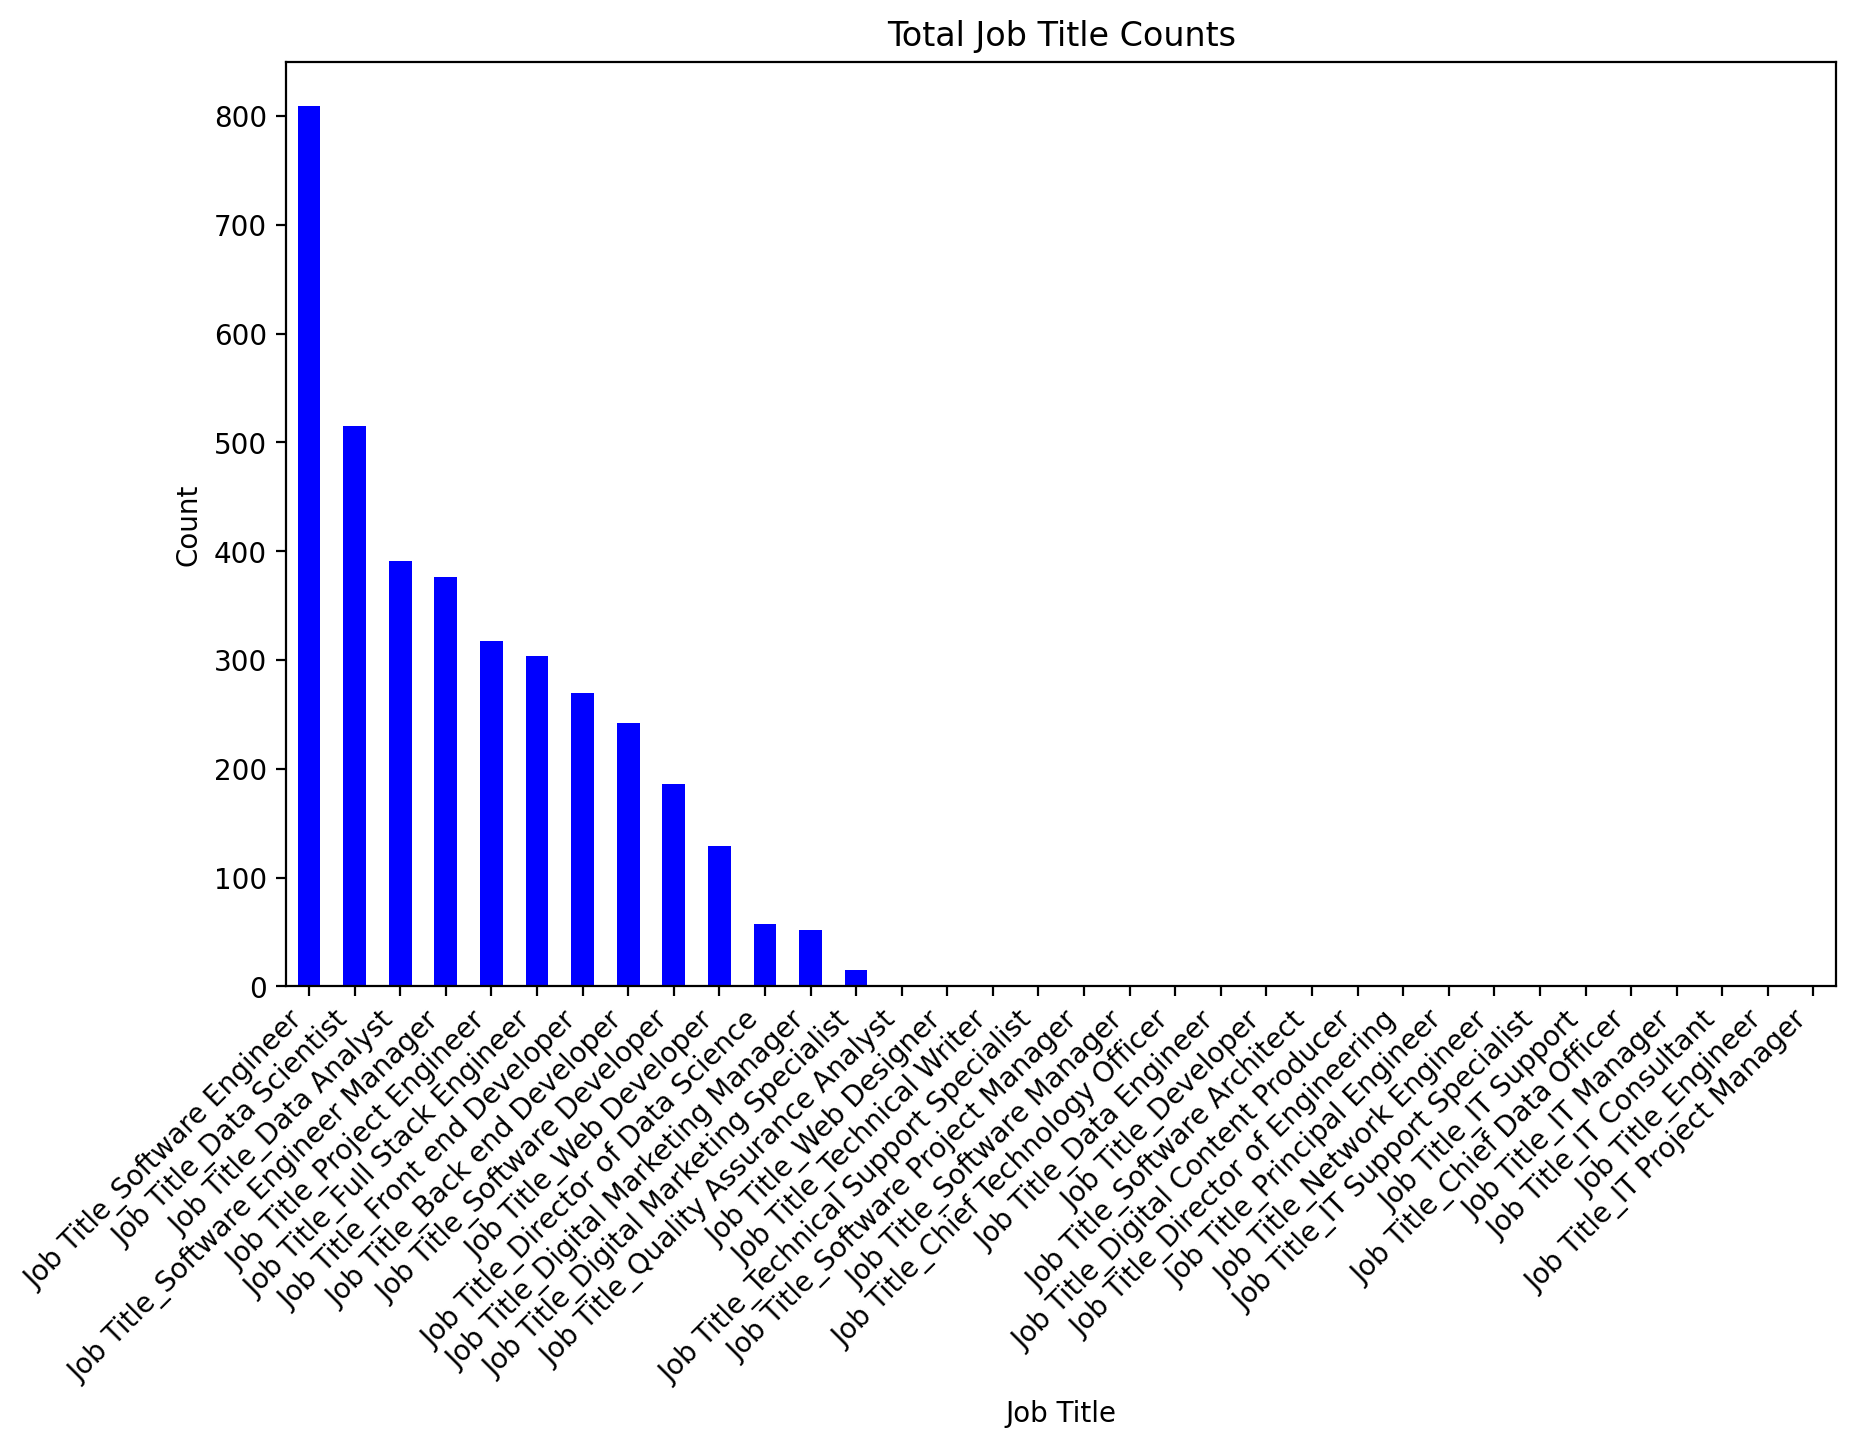

In [ ]:
import matplotlib.pyplot as plt

# Combine the filtered job titles and their counts
combined_job_titles = filtered_job_titles.index
combined_counts = job_title_counts[combined_job_titles]

# Sort the combined counts in descending order
sorted_counts = combined_counts.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sorted_counts.plot(kind='bar', color='blue')
plt.title('Total Job Title Counts')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
combined_data

Age  Years of Experience    Salary  Job Title_Back end Developer  \
0     32.0                  5.0   90000.0                           0.0   
1     28.0                  3.0   65000.0                           0.0   
2     29.0                  3.0   75000.0                           0.0   
7     29.0                  3.0   75000.0                           0.0   
9     42.0                 14.0  115000.0                           0.0   
...    ...                  ...       ...                           ...   
3686  27.0                  2.0   40000.0                           0.0   
3687  43.0                 15.0  150000.0                           0.0   
3688  27.0                  2.0   40000.0                           0.0   
3689  43.0                 15.0  150000.0                           0.0   
3690  27.0                  2.0   40000.0                           0.0   

      Job Title_Chief Data Officer  Job Title_Chief Technology Officer  \
0                              0.0                                 0.0   
1                              0.0                                 0.0   
2                              0.0                                 0.0   
7                              0.0                                 0.0   
9                              0.0                                 0.0   
...                            ...                                 ...   
3686                           0.0                                 0.0   
3687                           0.0                                 0.0   
3688                           0.0                                 0.0   
3689                           0.0                                 0.0   
3690                           0.0                                 0.0   

      Job Title_Data Analyst  Job Title_Data Engineer  \
0                        0.0                      0.0   
1                        1.0                      0.0   
2                        0.0                      0.0   
7                        0.0                      0.0   
9                        0.0                      0.0   
...                      ...                      ...   
3686                     0.0                      0.0   
3687                     0.0                      0.0   
3688                     0.0                      0.0   
3689                     0.0                      0.0   
3690                     0.0                      0.0   

      Job Title_Data Scientist  Job Title_Developer  ...  Race_Australian  \
0                          0.0                  0.0  ...              0.0   
1                          0.0                  0.0  ...              0.0   
2                          0.0                  0.0  ...              0.0   
7                          1.0                  0.0  ...              0.0   
9                          0.0                  0.0  ...              0.0   
...                        ...                  ...  ...              ...   
3686                       0.0                  0.0  ...              0.0   
3687                       0.0                  0.0  ...              0.0   
3688                       0.0                  0.0  ...              0.0   
3689                       0.0                  0.0  ...              1.0   
3690                       0.0                  0.0  ...              0.0   

      Race_Black  Race_Chinese  Race_Hispanic  Race_Korean  Race_Mixed  \
0            0.0           0.0            0.0          0.0         0.0   
1            0.0           0.0            1.0          0.0         0.0   
2            0.0           0.0            0.0          0.0         0.0   
7            0.0           0.0            1.0          0.0         0.0   
9            0.0           0.0            0.0          0.0         0.0   
...          ...           ...            ...          ...         ...   
3686         0.0           0.0            0.0          0.0         0.0   
3687         0.

In [ ]:
# combined_data를 CSV 파일로 저장
combined_data.to_csv('/content/drive/MyDrive/0 기계학습/팀플/combined_data.csv', index=False)

In [ ]:
original_df = pd.read_csv('/content/drive/MyDrive/Salary.csv')
combined_df = pd.read_csv('/content/drive/MyDrive/0 기계학습/팀플/combined_data.csv')

# 랜덤 포레스트 모델 구축 및 평가
X = combined_df.drop('Salary', axis=1)
y = combined_df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt

# RMSE and R² scores from (1) and (2)
rmse_values = [11863.848641041293, 9728.402964642051]
r2_values = [0.9442445807486252, 0.9590268589537566]

# Create a bar plot
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot RMSE values
axs[0].bar(['(1)', '(2)'], rmse_values, color=['red', 'green'])
axs[0].set_title('Root Mean Squared Error (RMSE)')
axs[0].set_ylabel('RMSE Value')

# Plot R² values
axs[1].bar(['(1)', '(2)'], r2_values, color=['red', 'green'])
axs[1].set_title('R² Score')
axs[1].set_ylabel('R² Value')

plt.tight_layout()
plt.show()


# Job title과 years of experience 등 조건을 입력하면 해당 직업의 경력별 연봉 추이와 본인 경력의 연봉 수준 예측치를 비교해 확인할 수 있도록 함

In [ ]:
#직업별 years of experience 최대최소중앙값 -> 어느정도 수준에서 years of experience 보여줘야 하는 지 설정(0~33),
import matplotlib.pyplot as plt


selected_job_titles = [
    'Software Engineer', 'Data Scientist', 'Data Analyst',
    'Software Engineer Manager', 'Project Engineer', 'Full Stack Engineer',
    'Front enㄴd Developer', 'Back end Developer', 'Software Developer',
    'Web Developer', 'Director of Data Science', 'Digital Marketing Manager',
    'Digital Marketing Specialist'
]

# Filter data for the selected job titles
selected_data = original_df[original_df['Job Title'].isin(selected_job_titles)]

# Calculate min, max, and mid values of 'Years of Experience' for each job title
result = selected_data.groupby('Job Title')['Years of Experience'].agg(['min', 'max', 'median']).reset_index()

# Print or use the results as needed
print(result)

                       Job Title   min   max  median
0             Back end Developer   0.0  25.0     5.0
1                   Data Analyst   1.0  19.0     3.0
2                 Data Scientist   1.5  24.0     9.0
3      Digital Marketing Manager   1.0  15.0     6.0
4   Digital Marketing Specialist   3.0   4.0     4.0
5       Director of Data Science  12.0  20.0    18.0
6            Full Stack Engineer   1.0  33.0     6.0
7               Project Engineer   0.0  30.0    14.0
8             Software Developer   1.0  16.0     2.0
9              Software Engineer   1.0  32.0     5.0
10     Software Engineer Manager   0.0  34.0    16.0
11                 Web Developer   1.0  10.0     3.0


In [ ]:
combined_df.columns

Index(['Age', 'Years of Experience', 'Salary', 'Job Title_Back end Developer',
       'Job Title_Chief Data Officer', 'Job Title_Chief Technology Officer',
       'Job Title_Data Analyst', 'Job Title_Data Engineer',
       'Job Title_Data Scientist', 'Job Title_Developer',
       'Job Title_Digital Content Producer',
       'Job Title_Digital Marketing Manager',
       'Job Title_Digital Marketing Specialist',
       'Job Title_Director of Data Science',
       'Job Title_Director of Engineering', 'Job Title_Engineer',
       'Job Title_Front end Developer', 'Job Title_Full Stack Engineer',
       'Job Title_IT Consultant', 'Job Title_IT Manager',
       'Job Title_IT Project Manager', 'Job Title_IT Support',
       'Job Title_IT Support Specialist', 'Job Title_Network Engineer',
       'Job Title_Principal Engineer', 'Job Title_Project Engineer',
       'Job Title_Quality Assurance Analyst', 'Job Title_Software Architect',
       'Job Title_Software Developer', 'Job Title_Software Eng

Select job title:
1. Software Engineer
2. Data Scientist
3. Data Analyst
4. Software Engineer Manager
5. Project Engineer
6. Full Stack Engineer
7. Front end Developer
8. Back end Developer
9. Software Developer
10. Web Developer
11. Director of Data Science
12. Digital Marketing Manager
13. Digital Marketing Specialist
Enter the number corresponding to your selection: 1
Enter Years of Experience for prediction(ex: 5): 0


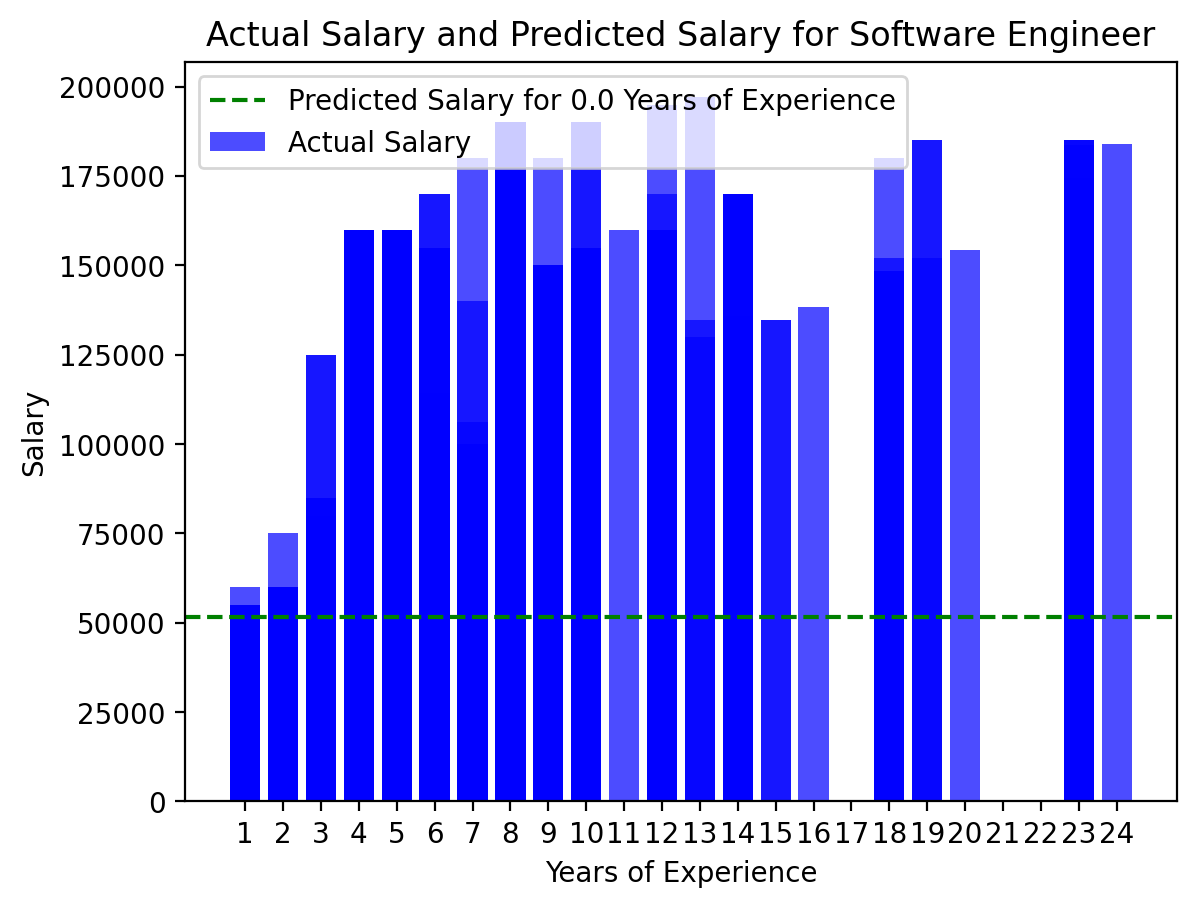

In [ ]:
#Job Title과 Years of experience 입력해서 그래프로 확인하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# input job title
selected_job_title = input('Select job title:\n'
                           '1. Software Engineer\n'
                           '2. Data Scientist\n'
                           '3. Data Analyst\n'
                           '4. Software Engineer Manager\n'
                           '5. Project Engineer\n'
                           '6. Full Stack Engineer\n'
                           '7. Front end Developer\n'
                           '8. Back end Developer\n'
                           '9. Software Developer\n'
                           '10. Web Developer\n'
                           '11. Director of Data Science\n'
                           '12. Digital Marketing Manager\n'
                           '13. Digital Marketing Specialist\n'
                           'Enter the number corresponding to your selection: ')

job_titles = [
    'Software Engineer', 'Data Scientist', 'Data Analyst',
    'Software Engineer Manager', 'Project Engineer', 'Full Stack Engineer',
    'Front end Developer', 'Back end Developer', 'Software Developer',
    'Web Developer', 'Director of Data Science', 'Digital Marketing Manager',
    'Digital Marketing Specialist'
]

selected_job_title = job_titles[int(selected_job_title) - 1]

# Filter data for the selected job title
selected_data = combined_df[combined_df[f'Job Title_{selected_job_title}'] == 1]

# Extract features and target variable
X = selected_data[['Years of Experience']]
y = selected_data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# User input for Years of Experience
user_experience = float(input("Enter Years of Experience for prediction(ex: 5): "))

# Make a prediction for the user input
user_salary_pred = rf_model.predict([[user_experience]])

# Plotting the original data as a bar graph
plt.bar(X_test.squeeze(), y_test, color='blue', alpha=0.7, label='Actual Salary')

# Plot the user input prediction as a horizontal line
plt.axhline(y=user_salary_pred, color='green', linestyle='--', label=f'Predicted Salary for {user_experience} Years of Experience')

# Customize the plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'Actual Salary and Predicted Salary for {selected_job_title}')
plt.xticks(np.arange(min(X_test.squeeze()), max(X_test.squeeze())+1, 1))  # Display all numbers on the x-axis
plt.legend()
plt.show()


Select job title:
1. Software Engineer
2. Data Scientist
3. Data Analyst
4. Software Engineer Manager
5. Project Engineer
6. Full Stack Engineer
7. Front end Developer
8. Back end Developer
9. Software Developer
10. Web Developer
11. Director of Data Science
12. Digital Marketing Manager
13. Digital Marketing Specialist
Enter the number corresponding to your selection: 3
Enter Years of Experience for prediction (e.g., 5): 3
Enter Country 
1. Australia
2. Canada
3. China
4. UK
5. USA
Enter the number corresponding to your selection: 3


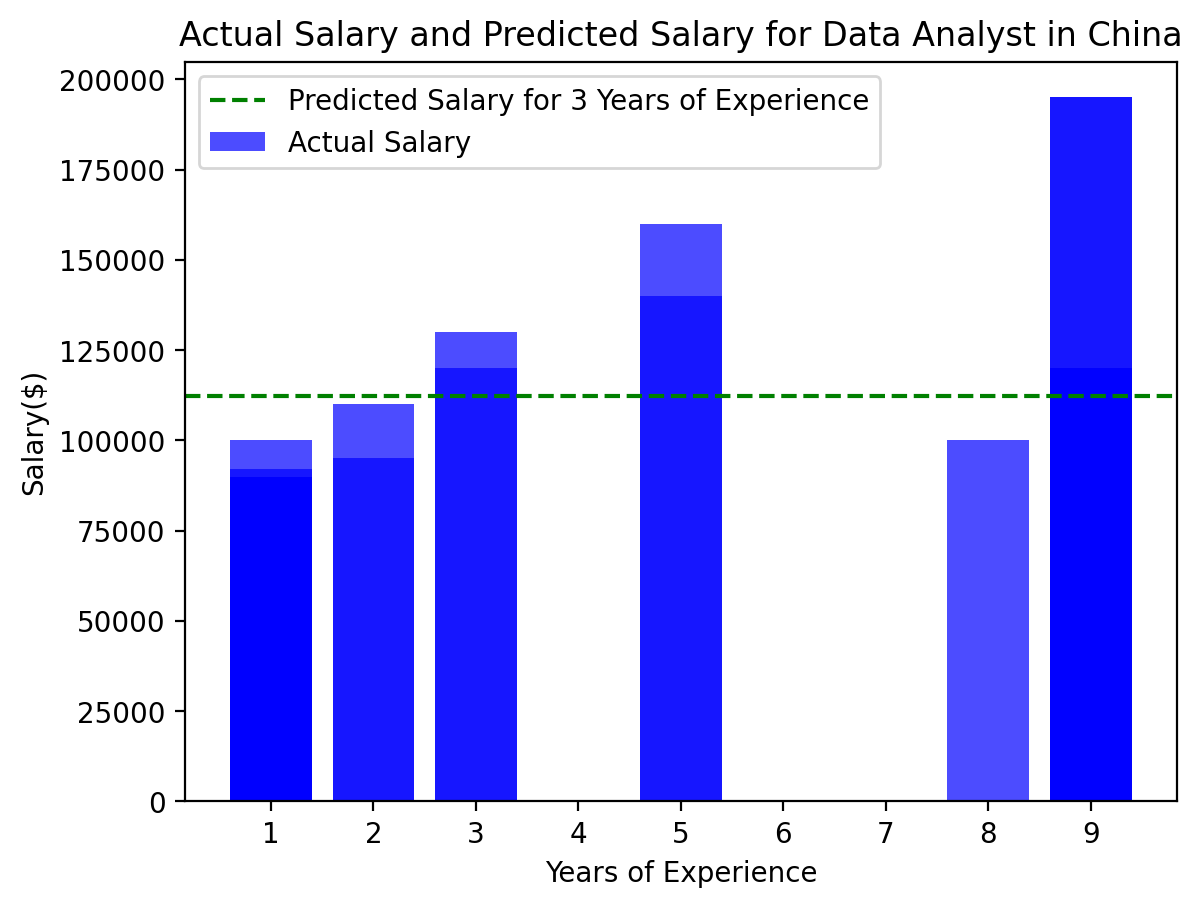

In [ ]:
#결측치 예측치로 채워넣기(실패) -> 0~3년 이런 식으로 단위 나눠서 다시 만들어보기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# User input
selected_job_title = int(input('Select job title:\n'
                               '1. Software Engineer\n'
                               '2. Data Scientist\n'
                               '3. Data Analyst\n'
                               '4. Software Engineer Manager\n'
                               '5. Project Engineer\n'
                               '6. Full Stack Engineer\n'
                               '7. Front end Developer\n'
                               '8. Back end Developer\n'
                               '9. Software Developer\n'
                               '10. Web Developer\n'
                               '11. Director of Data Science\n'
                               '12. Digital Marketing Manager\n'
                               '13. Digital Marketing Specialist\n'
                               'Enter the number corresponding to your selection: '))

user_experience = int(input("Enter Years of Experience for prediction (e.g., 5): "))
user_country = int(input('Enter Country \n'
                         '1. Australia\n'
                         '2. Canada\n'
                         '3. China\n'
                         '4. UK\n'
                         '5. USA\n'
                         'Enter the number corresponding to your selection: '))

job_titles = [
    'Software Engineer', 'Data Scientist', 'Data Analyst',
    'Software Engineer Manager', 'Project Engineer', 'Full Stack Engineer',
    'Front end Developer', 'Back end Developer', 'Software Developer',
    'Web Developer', 'Director of Data Science', 'Digital Marketing Manager',
    'Digital Marketing Specialist'
]

country = ['Australia', 'Canada', 'China', 'UK', 'USA']

selected_job_title = job_titles[selected_job_title - 1]
selected_country = country[user_country - 1]

# Filter data for the selected job title
selected_data = combined_df[combined_df[f'Job Title_{selected_job_title}'] == 1]

# Filter data for the selected country
selected_data = selected_data[selected_data[f'Country_{selected_country}'] == 1]

# Handle missing values in "Years of Experience" and "Salary"
selected_data['Years of Experience'].fillna(selected_data['Years of Experience'].mean(), inplace=True)
selected_data['Salary'].fillna(selected_data.groupby('Years of Experience')['Salary'].transform('mean'), inplace=True)

# Extract features and target variable
X = selected_data[['Years of Experience', f'Country_{selected_country}', f'Job Title_{selected_job_title}']]
y = selected_data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make a prediction for the user input
user_data = pd.DataFrame([[user_experience, 1, 1]],
                         columns=['Years of Experience', f'Country_{selected_country}', f'Job Title_{selected_job_title}'])
user_salary_pred = rf_model.predict(user_data)

# Plotting the original data as a bar graph
plt.bar(X_test['Years of Experience'], y_test, color='blue', alpha=0.7, label='Actual Salary')

# Plot the user input prediction as a horizontal line
plt.axhline(y=user_salary_pred, color='green', linestyle='--', label=f'Predicted Salary for {user_experience} Years of Experience')

# Customize the plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary($)')
plt.title(f'Actual Salary and Predicted Salary for {selected_job_title} in {selected_country}')
plt.xticks(np.arange(min(X_test['Years of Experience']), max(X_test['Years of Experience']) + 1, 1))  # Display all numbers on the x-axis
plt.legend()
plt.show()


Job title, year of experience, country -> salary

In [ ]:
#여러 조건 넣었을 때의 salary 예측 값 구하기
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ... (Assuming combined_df is loaded or created)

# User input
selected_job_title = int(input('Select job title:\n'
                               '1. Software Engineer\n'
                               '2. Data Scientist\n'
                               '3. Data Analyst\n'
                               '4. Software Engineer Manager\n'
                               '5. Project Engineer\n'
                               '6. Full Stack Engineer\n'
                               '7. Front end Developer\n'
                               '8. Back end Developer\n'
                               '9. Software Developer\n'
                               '10. Web Developer\n'
                               '11. Director of Data Science\n'
                               '12. Digital Marketing Manager\n'
                               '13. Digital Marketing Specialist\n'
                               'Enter the number corresponding to your selection: '))

user_experience = int(input("Enter Years of Experience for prediction (e.g., 5): "))
user_country = int(input('Enter Country \n'
                         '1. Australia\n'
                         '2. Canada\n'
                         '3. China\n'
                         '4. UK\n'
                         '5. USA\n'
                         'Enter the number corresponding to your selection: '))

job_titles = [
    'Software Engineer', 'Data Scientist', 'Data Analyst',
    'Software Engineer Manager', 'Project Engineer', 'Full Stack Engineer',
    'Front end Developer', 'Back end Developer', 'Software Developer',
    'Web Developer', 'Director of Data Science', 'Digital Marketing Manager',
    'Digital Marketing Specialist'
]

country = ['Australia', 'Canada', 'China', 'UK', 'USA']

selected_job_title = job_titles[selected_job_title - 1]
selected_country = country[user_country - 1]

# Filter data for the selected job title
selected_data = combined_df[combined_df[f'Job Title_{selected_job_title}'] == 1]

# Filter data for the selected country
selected_data = selected_data[selected_data[f'Country_{selected_country}'] == 1]

# Extract features and target variable
X = selected_data[['Years of Experience', f'Country_{selected_country}', f'Job Title_{selected_job_title}']]
y = selected_data['Salary']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Make a prediction for the user input
user_data = pd.DataFrame([[user_experience, user_country, 1]],
                         columns=['Years of Experience', f'Country_{selected_country}', f'Job Title_{selected_job_title}'])
user_salary_pred = rf_model.predict(user_data)

print(f'Predicted Salary for {user_experience} Years of Experience in {selected_country} as {selected_job_title}: ${user_salary_pred[0]:,.2f}')


Select job title:
1. Software Engineer
2. Data Scientist
3. Data Analyst
4. Software Engineer Manager
5. Project Engineer
6. Full Stack Engineer
7. Front end Developer
8. Back end Developer
9. Software Developer
10. Web Developer
11. Director of Data Science
12. Digital Marketing Manager
13. Digital Marketing Specialist
Enter the number corresponding to your selection: 1
Enter Years of Experience for prediction (e.g., 5): 0
Enter Country 
1. Australia
2. Canada
3. China
4. UK
5. USA
Enter the number corresponding to your selection: 1
Predicted Salary for 0 Years of Experience in Australia as Software Engineer: $51,578.77


Select job title:
1. Software Engineer
2. Data Scientist
3. Data Analyst
4. Software Engineer Manager
5. Project Engineer
6. Full Stack Engineer
7. Front end Developer
8. Back end Developer
9. Software Developer
10. Web Developer
11. Director of Data Science
12. Digital Marketing Manager
13. Digital Marketing Specialist
Enter the number corresponding to your selection: 5
Enter Years of Experience for prediction (e.g., 5): 5
Enter Country 
1. Australia
2. Canada
3. China
4. UK
5. USA
Enter the number corresponding to your selection: 5


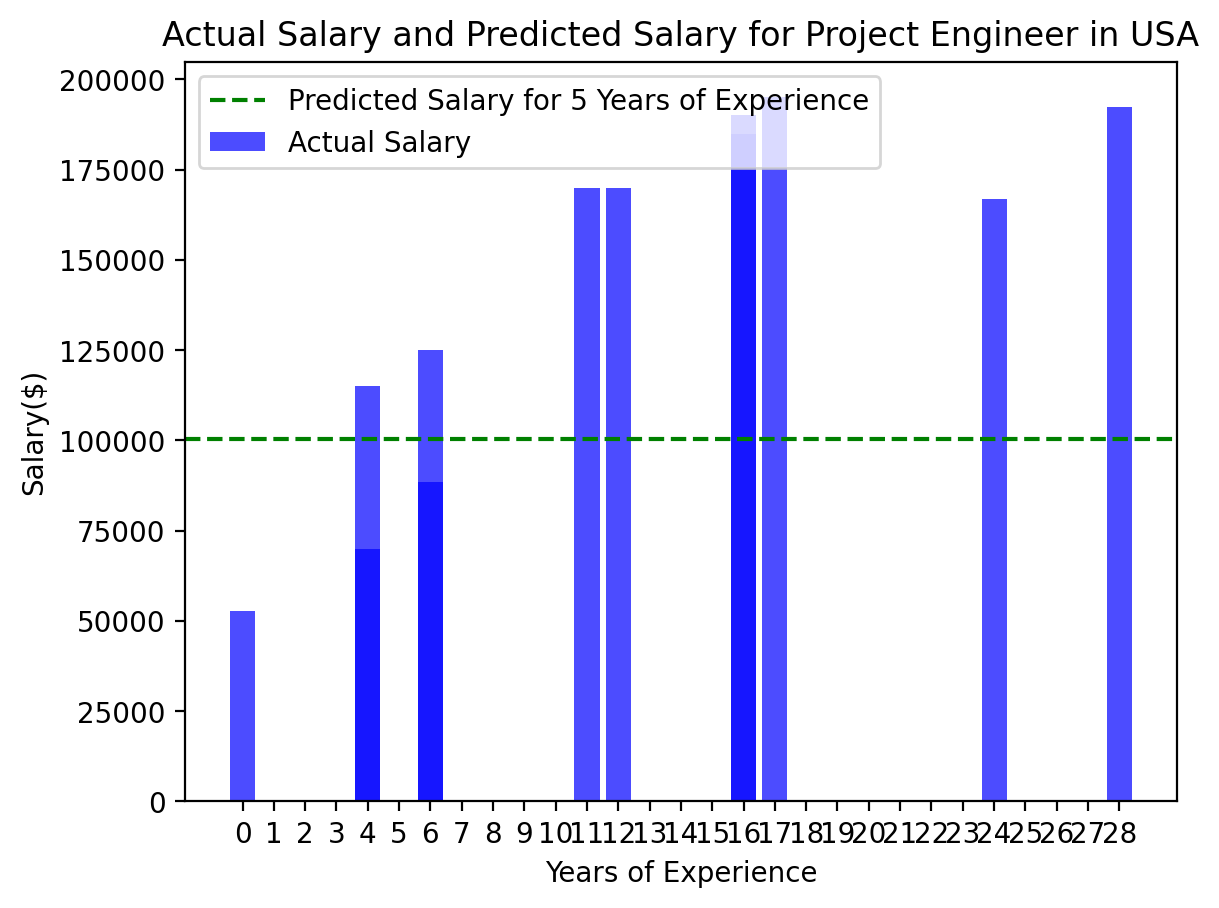

In [ ]:
#여러 조건 넣었을 때의 예측치와 실제 해당 직업의 salary 비교하는 그래프 보이기
# ... (Assuming combined_df is loaded or created)

# ... (Assuming combined_df is loaded or created)

# User input
selected_job_title = int(input('Select job title:\n'
                               '1. Software Engineer\n'
                               '2. Data Scientist\n'
                               '3. Data Analyst\n'
                               '4. Software Engineer Manager\n'
                               '5. Project Engineer\n'
                               '6. Full Stack Engineer\n'
                               '7. Front end Developer\n'
                               '8. Back end Developer\n'
                               '9. Software Developer\n'
                               '10. Web Developer\n'
                               '11. Director of Data Science\n'
                               '12. Digital Marketing Manager\n'
                               '13. Digital Marketing Specialist\n'
                               'Enter the number corresponding to your selection: '))

user_experience = int(input("Enter Years of Experience for prediction (e.g., 5): "))
user_country = int(input('Enter Country \n'
                         '1. Australia\n'
                         '2. Canada\n'
                         '3. China\n'
                         '4. UK\n'
                         '5. USA\n'
                         'Enter the number corresponding to your selection: '))

job_titles = [
    'Software Engineer', 'Data Scientist', 'Data Analyst',
    'Software Engineer Manager', 'Project Engineer', 'Full Stack Engineer',
    'Front end Developer', 'Back end Developer', 'Software Developer',
    'Web Developer', 'Director of Data Science', 'Digital Marketing Manager',
    'Digital Marketing Specialist'
]

country = ['Australia', 'Canada', 'China', 'UK', 'USA']

selected_job_title = job_titles[selected_job_title - 1]
selected_country = country[user_country - 1]

# Filter data for the selected job title
selected_data = combined_df[combined_df[f'Job Title_{selected_job_title}'] == 1]

# Filter data for the selected country
selected_data = selected_data[selected_data[f'Country_{selected_country}'] == 1]

# 모델
# Extract features and target variable
X = selected_data[['Years of Experience', f'Country_{selected_country}', f'Job Title_{selected_job_title}']]
y = selected_data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make a prediction for the user input
user_data = pd.DataFrame([[user_experience, 1, 1]],
                         columns=['Years of Experience', f'Country_{selected_country}', f'Job Title_{selected_job_title}'])
user_salary_pred = rf_model.predict(user_data)

# Plotting the original data as a bar graph
plt.bar(X_test['Years of Experience'], y_test, color='blue', alpha=0.7, label='Actual Salary')

# Plot the user input prediction as a horizontal line
plt.axhline(y=user_salary_pred, color='green', linestyle='--', label=f'Predicted Salary for {user_experience} Years of Experience')

# Customize the plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary($)')
plt.title(f'Actual Salary and Predicted Salary for {selected_job_title} in {selected_country}')
plt.xticks(np.arange(min(X_test['Years of Experience']), max(X_test['Years of Experience']) + 1, 1))  # Display all numbers on the x-axis
plt.legend()
plt.show()


In [ ]:
# salary 이전과 이후 평균내서 결측치 채우기


# 동 조건에서 직군별 연봉 비교

- Software Engineer
- Full Stack Engineer
- Data Scientist
- Software Engineer Manager
- Data Analyst
- Project Engineer
- Back end Developer
- Front end Developer
- Software Developer
- Web Developer
- Director of Data Science

30살, 5년 경력, 학사, 미국 기업, 백인

In [ ]:
# 예측을 위한 공통 조건 설정
common_conditions = {
    'Age': 30,
    'Years of Experience': 5,
    'Education Level_1': 1,  # 학사 학위
    'Country_USA': 1,
    'Race_White': 1,
    'Senior_0': 1
}

# 비교할 직군
job_titles = ['Software Engineer', 'Full Stack Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Project Engineer', 'Back end Developer', 'Front end Developer', 'Software Developer', 'Web Developer', 'Director of Data Science']
# 각 직군별 예측 연봉 계산
predicted_salaries = {}
for job_title in job_titles:
    # 원-핫 인코딩된 데이터셋에서 입력 행 생성
    input_data = np.zeros(len(X.columns))
    for col, value in common_conditions.items():
        input_data[X.columns.get_loc(col)] = value
    input_data[X.columns.get_loc(f'Job Title_{job_title}')] = 1

    # 연봉 예측
    predicted_salary = rf_model.predict([input_data])[0]
    predicted_salaries[job_title] = predicted_salary

predicted_salaries

{'Software Engineer': 81000.0,
 'Full Stack Engineer': 101747.38,
 'Data Scientist': 167273.28,
 'Software Engineer Manager': 98008.15,
 'Data Analyst': 146256.6666666667,
 'Project Engineer': 97884.07,
 'Back end Developer': 100085.68,
 'Front end Developer': 100934.98,
 'Software Developer': 87102.17,
 'Web Developer': 70250.0,
 'Director of Data Science': 98008.15}

In [ ]:
int(input('Age(ex: 30): '))
int(input('Years of Experience(ex: 5): '))
int(input('

KeyboardInterrupt: ignored

지금의 내가 만약 미국 기업에 취직한다면?

In [ ]:
# 예측을 위한 공통 조건 설정
common_conditions = {
    'Age': 26,
    'Years of Experience': 1,
    'Education Level_1': 1,  # 학사 학위
    'Country_USA': 1,
    'Race_Korean': 1,
    'Senior_0': 1
}

# 비교할 직군
job_titles = ['Software Engineer', 'Full Stack Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Project Engineer', 'Back end Developer', 'Front end Developer', 'Software Developer', 'Web Developer', 'Director of Data Science']

# 각 직군별 예측 연봉 계산
predicted_salaries = {}
for job_title in job_titles:
    # 원-핫 인코딩된 데이터셋에서 입력 행 생성
    input_data = np.zeros(len(X.columns))
    for col, value in common_conditions.items():
        input_data[X.columns.get_loc(col)] = value
    input_data[X.columns.get_loc(f'Job Title_{job_title}')] = 1

    # 연봉 예측
    predicted_salary = rf_model.predict([input_data])[0]
    predicted_salaries[job_title] = predicted_salary

predicted_salaries

{'Software Engineer': 48970.0,
 'Full Stack Engineer': 48870.0,
 'Data Scientist': 72450.0,
 'Software Engineer Manager': 56523.50333333334,
 'Data Analyst': 107808.33333333334,
 'Project Engineer': 48870.0,
 'Back end Developer': 52532.98,
 'Front end Developer': 55777.77777777778,
 'Software Developer': 38210.0,
 'Web Developer': 41420.0,
 'Director of Data Science': 48870.0}

In [ ]:
# 예측을 위한 공통 조건 설정
common_conditions = {
    'Age': 26,
    'Years of Experience': 1,
    'Education Level_1': 1,  # 학사 학위
    'Country_USA': 1,
    'Race_White': 1,
    'Senior_0': 1
}

# 비교할 직군
job_titles = ['Software Engineer', 'Full Stack Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Project Engineer', 'Back end Developer', 'Front end Developer', 'Software Developer', 'Web Developer', 'Director of Data Science']

# 각 직군별 예측 연봉 계산
predicted_salaries = {}
for job_title in job_titles:
    # 원-핫 인코딩된 데이터셋에서 입력 행 생성
    input_data = np.zeros(len(X.columns))
    for col, value in common_conditions.items():
        input_data[X.columns.get_loc(col)] = value
    input_data[X.columns.get_loc(f'Job Title_{job_title}')] = 1

    # 연봉 예측
    predicted_salary = rf_model.predict([input_data])[0]
    predicted_salaries[job_title] = predicted_salary

predicted_salaries

{'Software Engineer': 49983.72,
 'Full Stack Engineer': 49453.07,
 'Data Scientist': 72450.0,
 'Software Engineer Manager': 57390.72833333334,
 'Data Analyst': 105200.0,
 'Project Engineer': 49453.07,
 'Back end Developer': 52781.25,
 'Front end Developer': 55736.86,
 'Software Developer': 37760.0,
 'Web Developer': 41540.0,
 'Director of Data Science': 49453.07}

경력이 쌓인다면?

In [ ]:
# 예측을 위한 공통 조건 설정
common_conditions = {
    'Age': 30,
    'Years of Experience': 3,
    'Education Level_1': 1,  # 학사 학위
    'Country_USA': 1,
    'Race_Korean': 1,
    'Senior_0': 1
}

# 비교할 직군

# job_titles = ['Developer', 'Data Scientist', 'Project Engineer', 'Back end Developer', 'Front end Developer', 'Full Stack Engineer']
job_titles = ['Software Engineer', 'Full Stack Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Project Engineer', 'Back end Developer', 'Front end Developer', 'Software Developer', 'Web Developer', 'Director of Data Science']

# 각 직군별 예측 연봉 계산
predicted_salaries = {}
for job_title in job_titles:
    # 원-핫 인코딩된 데이터셋에서 입력 행 생성
    input_data = np.zeros(len(X.columns))
    for col, value in common_conditions.items():
        input_data[X.columns.get_loc(col)] = value
    input_data[X.columns.get_loc(f'Job Title_{job_title}')] = 1

    # 연봉 예측
    predicted_salary = rf_model.predict([input_data])[0]
    predicted_salaries[job_title] = predicted_salary

predicted_salaries

{'Software Engineer': 87309.72571428571,
 'Full Stack Engineer': 87961.90666666666,
 'Data Scientist': 115725.99333333332,
 'Software Engineer Manager': 82312.11666666665,
 'Data Analyst': 64150.0,
 'Project Engineer': 80466.45666666667,
 'Back end Developer': 86013.29666666666,
 'Front end Developer': 83413.29666666666,
 'Software Developer': 63670.0,
 'Web Developer': 59750.0,
 'Director of Data Science': 82312.11666666665}

In [ ]:
# country_USA이면서 race_Korean인 조건에 해당하는 행 필터링
usa_korean_condition = combined_data[combined_data['Race_Korean'] == 1]

# 결과 출력
usa_korean_condition

Age  Years of Experience    Salary  Job Title_Back end Developer  \
13    38.0                 10.0   90000.0                           0.0   
34    34.0                  9.0  105000.0                           0.0   
64    30.0                  5.0  180000.0                           0.0   
76    28.0                  3.0  125000.0                           0.0   
78    30.0                  5.0  180000.0                           0.0   
...    ...                  ...       ...                           ...   
3556  31.0                  8.0  140000.0                           0.0   
3640  26.0                  2.0   75000.0                           0.0   
3651  32.0                  9.0  145000.0                           0.0   
3652  27.0                  3.0   80000.0                           0.0   
3688  27.0                  2.0   40000.0                           0.0   

      Job Title_Chief Data Officer  Job Title_Chief Technology Officer  \
13                             0.0                                 0.0   
34                             0.0                                 0.0   
64                             0.0                                 0.0   
76                             0.0                                 0.0   
78                             0.0                                 0.0   
...                            ...                                 ...   
3556                           0.0                                 0.0   
3640                           0.0                                 0.0   
3651                           0.0                                 0.0   
3652                           0.0                                 0.0   
3688                           0.0                                 0.0   

      Job Title_Data Analyst  Job Title_Data Engineer  \
13                       0.0                      0.0   
34                       0.0                      0.0   
64                       0.0                      0.0   
76                       0.0                      0.0   
78                       0.0                      0.0   
...                      ...                      ...   
3556                     0.0                      0.0   
3640                     0.0                      0.0   
3651                     0.0                      0.0   
3652                     0.0                      0.0   
3688                     0.0                      0.0   

      Job Title_Data Scientist  Job Title_Developer  ...  Race_Australian  \
13                         0.0                  0.0  ...              0.0   
34                         0.0                  0.0  ...              0.0   
64                         1.0                  0.0  ...              0.0   
76                         0.0                  0.0  ...              0.0   
78                         1.0                  0.0  ...              0.0   
...                        ...                  ...  ...              ...   
3556                       1.0                  0.0  ...              0.0   
3640                       0.0                  0.0  ...              0.0   
3651                       1.0                  0.0  ...              0.0   
3652                       0.0                  0.0  ...              0.0   
3688                       0.0                  0.0  ...              0.0   

      Race_Black  Race_Chinese  Race_Hispanic  Race_Korean  Race_Mixed  \
13           0.0           0.0            0.0          1.0         0.0   
34           0.0           0.0            0.0          1.0         0.0   
64           0.0           0.0            0.0          1.0         0.0   
76           0.0           0.0            0.0          1.0         0.0   
78           0.0           0.0            0.0          1.0         0.0   
...          ...           ...            ...          ...         ...   
3556         0.0           0.0            0.0          1.0         0.0   
3640         0.

In [ ]:
# 'Race_Korean'인 사람들의 경력
korean_individuals = combined_data[combined_data['Race_Korean'] == 1]
korean_careers_jobs = korean_individuals['Years of Experience']

# 결과 출력
print(korean_careers_jobs)

13      10.0
34       9.0
64       5.0
76       3.0
78       5.0
        ... 
3556     8.0
3640     2.0
3651     9.0
3652     3.0
3688     2.0
Name: Years of Experience, Length: 242, dtype: float64


In [ ]:
# 'Race_Korean'이 1인 행 필터링
korean_individuals = combined_data[combined_data['Race_Korean'] == 1]

# 'Job Title' 관련 원-핫 인코딩된 열들 찾기
job_title_columns = [col for col in combined_data.columns if col.startswith('Job Title_')]

# 각 직종에 해당하는 한국인의 수 계산
korean_job_title_counts = korean_individuals[job_title_columns].sum().sort_values(ascending=False)

print(korean_job_title_counts)

Job Title_Software Engineer               61.0
Job Title_Full Stack Engineer             33.0
Job Title_Data Scientist                  29.0
Job Title_Software Engineer Manager       24.0
Job Title_Data Analyst                    23.0
Job Title_Project Engineer                20.0
Job Title_Back end Developer              14.0
Job Title_Front end Developer             11.0
Job Title_Software Developer               8.0
Job Title_Web Developer                    7.0
Job Title_Director of Data Science         6.0
Job Title_Digital Marketing Manager        4.0
Job Title_Digital Marketing Specialist     2.0
Job Title_Quality Assurance Analyst        0.0
Job Title_Web Designer                     0.0
Job Title_Technical Writer                 0.0
Job Title_Technical Support Specialist     0.0
Job Title_Software Project Manager         0.0
Job Title_Software Manager                 0.0
Job Title_Chief Technology Officer         0.0
Job Title_Data Engineer                    0.0
Job Title_Dev

In [ ]:
data['Race'].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

최종모델

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

file_path = '/content/drive/MyDrive/Salary.csv'

# CSV 파일에서 데이터를 불러옵니다.
data = pd.read_csv(file_path)

# '인종'과 'senior'여부는 연구에서 중요하지 않으므로 'Race'와 'Senior' 열을 삭제합니다.
data = data.drop(['Race', 'Senior'], axis=1)
data = data[data['Years of Experience'] < 20] # 경력 연수가 20년 이상인 데이터는 제거합니다.
# data = data[data['Age'] < 45] # 나이가 45세 이상인 데이터는 제거합니다.

# 관심있는해 직업만 필터링합니다.
job_titles = ['Software Engineer', 'Full Stack Engineer', 'Data Scientist',
              'Software Engineer Manager', 'Data Analyst', 'Project Engineer',
              'Back end Developer', 'Front end Developer', 'Software Developer',
              'Web Developer', 'Director of Data Science']
data = data[data['Job Title'].isin(job_titles)]


encoder = OneHotEncoder() # 'Job Title', 'Country', 'Gender' 열에 대해 원-핫 인코딩을 수행합니다.
encoded_data = encoder.fit_transform(data[['Job Title', 'Country', 'Gender']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out()) # 인코딩된 열을 데이터 프레임으로 변환합니다.

# 인코딩된 열을 나머지 데이터와 결합합니다.
data.reset_index(drop=True, inplace=True)
data = pd.concat([data.drop(['Job Title', 'Country', 'Gender'], axis=1), encoded_df], axis=1)

# 랜덤 포레스트에 사용할 데이터를 준비합니다.
X = data.drop('Salary', axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델을 훈련합니다.
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 모델을 사용하여 예측하고 평가합니다.
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(rmse)
print(r2)

9728.402964642051
0.9590268589537566
